# import the libraries

In [15]:
import pandas as pd
import json 
import numpy as np
import matplotlib.pyplot as plt

# explore the JSON file and trans the file into a data frame

In [22]:
with open(r'D:\data analysis\data analysis practies\task for interviwe\roomlist.json') as f:
    data = json.load(f)
    dfs = []
    for record in data['value']:
        df = pd.json_normalize(record) 
        dfs.append(df)
    final_d = pd.concat(dfs, ignore_index=True)

In [23]:
final_d

,HotelId,HotelName,Description,Description_fr,Category,Tags,ParkingIncluded,LastRenovationDate,Rating,Rooms,Address.StreetAddress,Address.City,Address.StateProvince,Address.PostalCode,Address.Country,Location.type,Location.coordinates
0,1,Secret Point Hotel,This classic hotel is ideally located on the m...,Cet hôtel classique est idéalement situé sur l...,Boutique,"[view, air conditioning, concierge]",False,2017-01-18T00:00:00Z,3.6,"[{'Description': 'Budget Room, 1 Queen Bed (Ci...",677 5th Ave,New York,NY,10022,USA,Point,"[-73.975403, 40.760586]"


In [24]:
final_d.info() #info about the nested json file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HotelId                1 non-null      object 
 1   HotelName              1 non-null      object 
 2   Description            1 non-null      object 
 3   Description_fr         1 non-null      object 
 4   Category               1 non-null      object 
 5   Tags                   1 non-null      object 
 6   ParkingIncluded        1 non-null      bool   
 7   LastRenovationDate     1 non-null      object 
 8   Rating                 1 non-null      float64
 9   Rooms                  1 non-null      object 
 10  Address.StreetAddress  1 non-null      object 
 11  Address.City           1 non-null      object 
 12  Address.StateProvince  1 non-null      object 
 13  Address.PostalCode     1 non-null      object 
 14  Address.Country        1 non-null      object 
 15  Location.t

In [25]:
final_d.shape 

(1, 17)

# establish a data frame to but the Rooms into it 

In [20]:
with open (r'D:\data analysis\data analysis practies\task for interviwe\roomlist.json') as f :
    data = json.load(f)
    dfs=[]
    records = data["value"]
   
    record_path ='Rooms'
    for record in records:
        
        if record_path:
            df= pd.json_normalize(record,record_path) # Flatten the nested records
        else:
            df= pd.json_normalize(record)  # Flatten the records to dataframe
            
        dfs.append(df)
        

final_df = pd.concat(dfs,ignore_index=True)

nested_record_path='Rooms'

## summarization about the data and metadata

In [26]:
final_df.info() #info about the Rooms data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     13 non-null     object 
 1   Description_fr  13 non-null     object 
 2   Type            13 non-null     object 
 3   BaseRate        13 non-null     float64
 4   BedOptions      13 non-null     object 
 5   SleepsCount     13 non-null     int64  
 6   SmokingAllowed  13 non-null     bool   
 7   Tags            13 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 873.0+ bytes


In [27]:
final_df.shape

(13, 8)

In [28]:
final_df

,Description,Description_fr,Type,BaseRate,BedOptions,SleepsCount,SmokingAllowed,Tags
0,"Budget Room, 1 Queen Bed (Cityside)","Chambre Économique, 1 grand lit (côté ville)",Budget Room,96.99,1 Queen Bed,2,True,[vcr/dvd]
1,"Budget Room, 1 King Bed (Mountain View)","Chambre Économique, 1 très grand lit (Mountain...",Budget Room,80.99,1 King Bed,2,True,"[vcr/dvd, jacuzzi tub]"
2,"Deluxe Room, 2 Double Beds (City View)","Chambre Deluxe, 2 lits doubles (vue ville)",Deluxe Room,150.99,2 Double Beds,2,False,"[suite, bathroom shower, coffee maker]"
3,"Standard Room, 1 King Bed (Amenities)","Chambre Standard, 1 très grand lit (Services)",Standard Room,110.99,1 King Bed,2,False,"[Room Tags, bathroom shower, bathroom shower]"
4,"Suite, 1 Queen Bed (Mountain View)","Suite, 1 grand lit (vue sur la montagne)",Suite,243.99,1 Queen Bed,2,False,[Room Tags]
5,"Suite, 2 Queen Beds (Mountain View)","Suite, 2 grands lits (vue sur la montagne)",Suite,229.99,2 Queen Beds,4,True,[vcr/dvd]
6,"Budget Room, 1 King Bed (Waterfront View)","Chambre Économique, 1 très grand lit (vue sur ...",Budget Room,87.99,1 King Bed,2,False,[tv]
7,"Suite, 1 King Bed (Waterfront View)","Suite, 1 très grand lit (vue sur le front de mer)",Suite,262.99,1 King Bed,2,False,"[vcr/dvd, vcr/dvd]"
8,"Suite, 2 Double Beds (Mountain View)","Suite, 2 lits doubles (vue sur la montagne)",Suite,248.99,2 Double Beds,2,False,"[coffee maker, coffee maker, coffee maker]"
9,"Suite, 1 King Bed (Mountain View)","Suite, 1 très grand lit (vue sur la montagne)",Suite,234.99,1 King Bed,2,True,[tv]


### Perform descriptive statistics on the room level in the data

In [29]:
final_df['BaseRate'].describe()

count     13.000000
mean     159.528462
std       74.393789
min       55.990000
25%       96.990000
50%      146.990000
75%      234.990000
max      262.990000
Name: BaseRate, dtype: float64

In [30]:
pd.value_counts(final_df['BedOptions'])

1 King Bed       7
2 Double Beds    3
1 Queen Bed      2
2 Queen Beds     1
Name: BedOptions, dtype: int64

<BarContainer object of 2 artists>

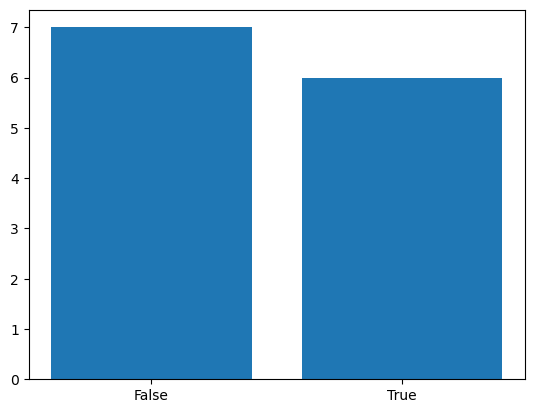

In [31]:
smoking_counts = final_df['SmokingAllowed'].value_counts()
plt.bar(smoking_counts.index.astype(str), smoking_counts)

<BarContainer object of 4 artists>

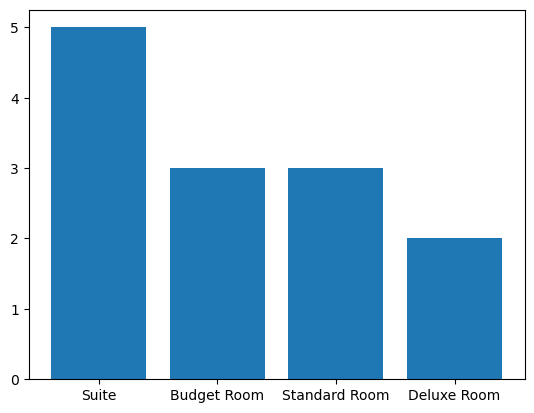

In [33]:
type_count=final_df['Type'].value_counts()
plt.bar(type_count.index.astype(str),type_count)

In [34]:
pd.value_counts(final_df['SleepsCount'])

2    12
4     1
Name: SleepsCount, dtype: int64

Text(0.5, 1.0, 'Rooms Base Rarte')

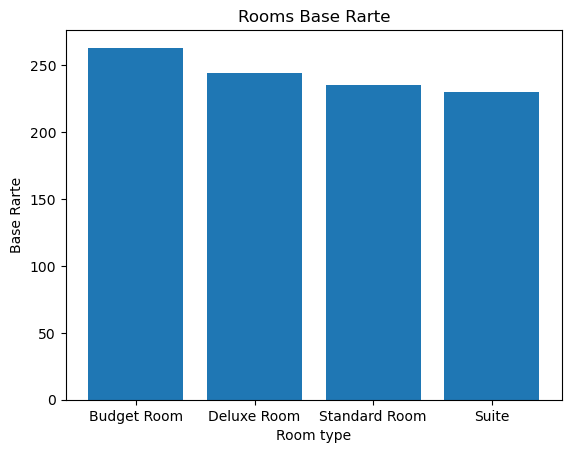

In [39]:
Type = final_df['Type']
BaseRate =final_df['BaseRate'].sort_values(ascending=False)

plt.bar(Type,BaseRate)
plt.xlabel('Room type')
plt.ylabel('Base Rarte')
plt.title('Rooms Base Rarte')

Text(0.5, 1.0, 'beds Base Rarte')

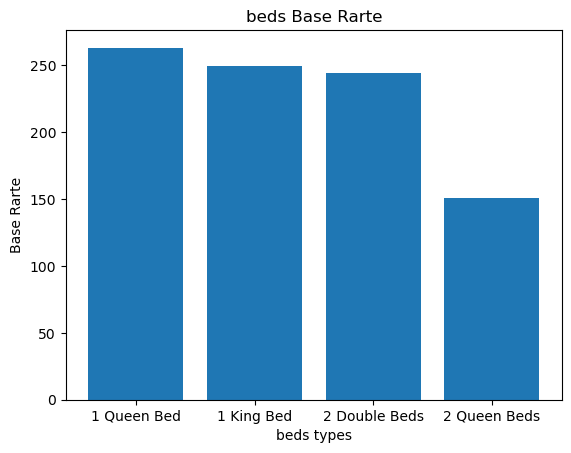

In [40]:
BedOptions= final_df['BedOptions']
BaseRate =final_df['BaseRate'].sort_values(ascending=False)
plt.bar(BedOptions,BaseRate)
plt.xlabel('beds types')
plt.ylabel('Base Rarte')
plt.title('beds Base Rarte')

### Perform a group by analysis on rooms level 

In [86]:
final_df.groupby(['Type']).agg(['count',sum,max,min,'mean'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5192\3114889607.py:1: FutureWarning: ['Description', 'Description_fr', 'BedOptions', 'Tags'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  final_df.groupby(['Type']).agg(['count',sum,max,min,'mean'])


BaseRate                                      SleepsCount      \
                 count      sum     max     min        mean       count sum   
Type                                                                          
Budget Room          3   265.97   96.99   80.99   88.656667           3   6   
Deluxe Room          2   297.98  150.99  146.99  148.990000           2   4   
Standard Room        3   288.97  121.99   55.99   96.323333           3   6   
Suite                5  1220.95  262.99  229.99  244.190000           5  12   

                           SmokingAllowed                              
              max min mean          count sum    max    min      mean  
Type                                                                   
Budget Room     2   2  2.0              3   2   True  False  0.666667  
Deluxe Room     2   2  2.0              2   0  False  False  0.000000  
Standard Room   2   2  2.0              3   2   True  False  0.666667  
Suite           4   2  2.4              5   2   True  False  0.400000